# maxvogt-analysis: Horgen

The code in this notebook is based on [Martin Fleischmann's](https://martinfleischmann.net/) 2021 workshop [*Capturing the Structure of Cities with Data Science (SDSC)*](https://github.com/martinfleis/sdsc21-workshop), licensed under the [CC BY-SA 4.0 license](https://creativecommons.org/licenses/by-sa/4.0/). © 2021 Martin Fleischmann.

The geodata in this notebook is retrieved from OpenStreetMap. © OpenStreetMap Contributors.

<hr>

This notebook contains geodata and analyses for the following items of the [Max Vogt collection](https://mtwente.github.io/maxvogt/) by Moritz Twente and Luisa Omonsky:
- [HG002](https://mtwente.github.io/maxvogt/items/hg002.html)
- [SBG086](https://mtwente.github.io/maxvogt/items/sbg086.html)

<hr>

Open in an interactive in-browser environment: 

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/mtwente/maxvogt-analysis/main?labpath=analysis%2Fhorgen.ipynb)

In [1]:
import warnings

import geopandas
import libpysal
import momepy
import osmnx
import pandas

from clustergram import Clustergram

import matplotlib.pyplot as plt
from bokeh.io import output_notebook
from bokeh.plotting import show

Pick a place, ideally a town with a good coverage in OpenStreetMap and its local CRS.

In [2]:
place = 'Horgen'
local_crs = 'EPSG:2056'

In [3]:
geopandas.tools.geocode(place).explore()

## Input data

Download data from OpenStreetMap.

### Buildings

In [4]:
buildings = osmnx.features.features_from_place(place, tags={'building':True})

/Users/mtwente/anaconda3/envs/maxvogt/lib/python3.11/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/Users/mtwente/anaconda3/envs/maxvogt/lib/python3.11/site-packages/shapely/set_operations.py:340: RuntimeWarning: invalid value encountered in union
  return lib.union(a, b, **kwargs)
/Users/mtwente/anaconda3/envs/maxvogt/lib/python3.11/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/Users/mtwente/anaconda3/envs/maxvogt/lib/python3.11/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/Users/mtwente/anaconda3/envs/maxvogt/lib/python3.11/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


In [5]:
buildings

ele                                   name  \
element_type osmid                                                   
node         568617765  NaN                 Wohngruppe Spyrigarten   
             592412398  NaN                                    NaN   
way          23766001   NaN                                    NaN   
             23766008   NaN                                    NaN   
             23766017   NaN                                    NaN   
...                     ...                                    ...   
relation     8709970    NaN                                    NaN   
             9205904    420  Bergwerk, Betriebsgebäude, Häuertreff   
             9322011    NaN                                    NaN   
             9322263    NaN                                    NaN   
             11846798   NaN                                    NaN   

                                                  website wikidata  \
element_type osmid                                                   
node         568617765                                NaN      NaN   
             592412398                                NaN      NaN   
way          23766001                                 NaN      NaN   
             23766008                                 NaN      NaN   
             23766017                                 NaN      NaN   
...                                                   ...      ...   
relation     8709970                                  NaN      NaN   
             9205904    http://www.bergwerk-kaepfnach.ch/      NaN   
             9322011                                  NaN      NaN   
             9322263                                  NaN      NaN   
             11846798                                 NaN      NaN   

                                   wikipedia  \
element_type osmid                             
node         568617765                   NaN   
             592412398                   NaN   
way          23766001                    NaN   
             23766008                    NaN   
             23766017                    NaN   
...                                      ...   
relation     8709970                     NaN   
             9205904    de:Bergwerk Käpfnach   
             9322011                     NaN   
             9322263                     NaN   
             11846798                    NaN   

                                                                 geometry  \
element_type osmid                                                          
node         568617765                           POINT (8.60652 47.21785)   
             592412398                           POINT (8.55340 47.26518)   
way          23766001   POLYGON ((8.57691 47.23839, 8.57696 47.23849, ...   
             23766008   POLYGON ((8.57707 47.23870, 8.57714 47.23885, ...   
             23766017   POLYGON ((8.57749 47.24208, 8.57765 47.24212, ...   
...                                                                   ...   
relation     8709970    POLYGON ((8.59923 47.25791, 8.59929 47.25789, ...   
             9205904    POLYGON ((8.61135 47.25579, 8.61136 47.25581, ...   
             9322011    POLYGON ((8.61463 47.25497, 8.61470 47.25496, ...   
             9322263    POLYGON ((8.61137 47.25582, 8.61137 47.25583, ...   
             11846798   POLYGON ((8.59894 47.24960, 8.59894 47.24959, ...   

                       man_made tower:type       building wheelchair  ...  \
element_type osmid                                                    ...   
node         568617765      NaN        NaN         public        yes  ...   
             592412398      NaN        NaN            yes        NaN  ...   
way          23766001       NaN        NaN        service        NaN  ...   
             23766008       NaN        NaN  train_station        NaN  ...   
             23766017       NaN        NaN     apartments        NaN  ...   
...                         ...     

In [6]:
buildings.geom_type.value_counts()

Polygon    4405
Point         2
Name: count, dtype: int64

In [7]:
buildings = buildings[buildings.geom_type == "Polygon"].reset_index(drop=True)

In [8]:
buildings = buildings[["geometry"]].to_crs(local_crs)

In [9]:
buildings["uID"] = range(len(buildings))

In [10]:
buildings

geometry   uID
0     POLYGON ((2686186.509 1232565.610, 2686189.629...     0
1     POLYGON ((2686198.118 1232600.536, 2686202.816...     1
2     POLYGON ((2686224.000 1232976.788, 2686236.026...     2
3     POLYGON ((2686041.467 1233166.544, 2686050.406...     3
4     POLYGON ((2686223.256 1233367.153, 2686232.653...     4
...                                                 ...   ...
4400  POLYGON ((2687844.074 1234760.243, 2687848.233...  4400
4401  POLYGON ((2688764.828 1234538.387, 2688765.590...  4401
4402  POLYGON ((2689014.197 1234451.155, 2689019.707...  4402
4403  POLYGON ((2688766.114 1234541.976, 2688766.389...  4403
4404  POLYGON ((2687835.257 1233836.065, 2687835.598...  4404

[4405 rows x 2 columns]

### Streets

In comparison to Martin Fleischmann's workshop, I here set `truncate_by_edge` to be `True`.
Depending on the OSM mapping quality of the place at hand, it might also be necessary to change the value of `network_type`. See [geopandas documentation](https://osmnx.readthedocs.io/en/stable/user-reference.html#osmnx.graph.graph_from_place) for options.

In [11]:
osm_graph = osmnx.graph_from_place(place, network_type='drive', truncate_by_edge=True)

/Users/mtwente/anaconda3/envs/maxvogt/lib/python3.11/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/mtwente/anaconda3/envs/maxvogt/lib/python3.11/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/Users/mtwente/anaconda3/envs/maxvogt/lib/python3.11/site-packages/shapely/set_operations.py:340: RuntimeWarning: invalid value encountered in union
  return lib.union(a, b, **kwargs)
/Users/mtwente/anaconda3/envs/maxvogt/lib/python3.11/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/Users/mtwente/anaconda3/envs/maxvogt/lib/python3.11/site-packages/shapely/set_operations.py:340: RuntimeWarning: invalid value encountered in union
  return lib.union(a, b, **kwargs)


In [12]:
osm_graph = osmnx.projection.project_graph(osm_graph, to_crs=local_crs)

In [13]:
streets = osmnx.graph_to_gdfs(
    osm_graph, 
    nodes=False, 
    edges=True,
    node_geometry=False, 
    fill_edge_geometry=True
)

In [14]:
streets.explore()

In [15]:
streets

osmid  \
u           v           key                                                      
453942      453966      0    [660916013, 660916014, 306293043, 660920699, 6...   
453966      566185188   0                                             17281772   
            33980358    0                      [24228122, 17281836, 306293093]   
566185188   566185191   0                                              5053172   
33980358    3111602950  0    [306293100, 306293069, 117946996, 306293079, 3...   
...                                                                        ...   
12157705083 12157705082 0                                           1313487776   
            10795906516 0                              [1313487776, 702116462]   
11224526888 471803170   0                                              9062655   
            66819255    0                                              9065331   
11884166172 11884157862 0                                           1280243038   

                             oneway   lanes  ref  \
u           v           key                        
453942      453966      0      True  [3, 2]   A3   
453966      566185188   0      True       1   35   
            33980358    0      True       2   A3   
566185188   566185191   0      True       1  341   
33980358    3111602950  0      True  [3, 2]   A3   
...                             ...     ...  ...   
12157705083 12157705082 0     False     NaN  NaN   
            10795906516 0     False     NaN  NaN   
11224526888 471803170   0      True     NaN  NaN   
            66819255    0      True     NaN  NaN   
11884166172 11884157862 0     False     NaN  NaN   

                                                  highway maxspeed  \
u           v           key                                          
453942      453966      0                        motorway      120   
453966      566185188   0                   motorway_link      120   
            33980358    0                        motorway      120   
566185188   566185191   0                       secondary       60   
33980358    3111602950  0                        motorway      120   
...                                                   ...      ...   
12157705083 12157705082 0                   living_street      NaN   
            10795906516 0    [living_street, residential]       30   
11224526888 471803170   0                     residential       30   
            66819255    0                     residential       30   
11884166172 11884157862 0                     residential      NaN   

                                  reversed    length bridge  \
u           v           key                                   
453942      453966      0            False  4230.315    yes   
453966      566185188   0            False   497.972    NaN   
            33980358    0            False   851.120    yes   
566185188   566185191   0            False    11.659    NaN   
33980358    3111602950  0            False  1432.115    yes   
...                                    ...       ...    ...   
12157705083 12157705082 0            False    10.469    NaN   
            10795906516 0    [False, True]    46.511    NaN   
11224526888 471803170   0            False    21.137    NaN   
            66819255    0            False    75.982    NaN   
11884166172 11884157862 0             True   208.318    NaN   

                                                                      geometry  \
u           v           key                                                      
453942      453966      0    LINESTRING (2685646.288 1236128.358, 2685699.1...   
453966      566185188   0    LINESTRING (2688435.411 1232978.153, 2688511.2...   
            33980358    0    LINESTRING (2688435.411 1232978.153, 2688488.2...   
566185188   566185191   0    LINESTRING (2688746.582 1232602.634, 2688749.4...   
33980358    3111602950  0    LINESTRING (2689040.440 1232377.890, 2689089.4...   
...                     

In [16]:
streets = momepy.remove_false_nodes(streets)
streets = streets[["geometry"]]
streets["nID"] = range(len(streets))

In [17]:
streets

geometry   nID
0     LINESTRING (2685646.288 1236128.358, 2685699.1...     0
1     LINESTRING (2688435.411 1232978.153, 2688511.2...     1
2     LINESTRING (2688435.411 1232978.153, 2688488.2...     2
3     LINESTRING (2688746.582 1232602.634, 2688749.4...     3
4     LINESTRING (2689040.440 1232377.890, 2689089.4...     4
...                                                 ...   ...
1068  LINESTRING (2689993.139 1234038.390, 2690011.0...  1068
1069  LINESTRING (2689732.582 1229579.354, 2689743.0...  1069
1070  LINESTRING (2690192.670 1233561.272, 2690189.4...  1070
1071  LINESTRING (2690260.456 1231977.512, 2690230.7...  1071
1072  LINESTRING (2690351.446 1233218.259, 2690361.5...  1072

[1073 rows x 2 columns]

## Generated data

### Tessellation

We can generate a spatail unit using Voronoi tessellation with given building footprints.

In [18]:
limit = momepy.buffered_limit(buildings, 100)

tessellation = momepy.Tessellation(buildings, "uID", limit, verbose=False, segment=1)
tessellation = tessellation.tessellation

/Users/mtwente/anaconda3/envs/maxvogt/lib/python3.11/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/mtwente/anaconda3/envs/maxvogt/lib/python3.11/site-packages/shapely/set_operations.py:426: RuntimeWarning: invalid value encountered in unary_union
  return lib.unary_union(collections, **kwargs)
/var/folders/vs/1r1r5k5x12v5dj0w9z79tj3c0000gn/T/ipykernel_17680/1328706492.py:3: FutureWarning: Class based API like `momepy.Tessellation` is deprecated. Replace it with `momepy.morphological_tessellation` or `momepy.enclosed_tessellation` to use functional API instead or pin momepy version <1.0. Class-based API will be removed in 1.0. 
  tessellation = momepy.Tessellation(buildings, "uID", limit, verbose=False, segment=1)
/Users/mtwente/anaconda3/envs/maxvogt/lib/python3.11/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/mtwente/anaconda3/envs/m

### Link streets

Link unique IDs of streets to buildings and tessellation cells based on the nearest neighbor join.

In [19]:
buildings = buildings.sjoin_nearest(streets, max_distance=1000, how="left")

In [20]:
buildings

geometry   uID  index_right  \
0     POLYGON ((2686186.509 1232565.610, 2686189.629...     0          253   
1     POLYGON ((2686198.118 1232600.536, 2686202.816...     1          250   
1     POLYGON ((2686198.118 1232600.536, 2686202.816...     1          253   
2     POLYGON ((2686224.000 1232976.788, 2686236.026...     2          250   
2     POLYGON ((2686224.000 1232976.788, 2686236.026...     2          253   
...                                                 ...   ...          ...   
4402  POLYGON ((2689014.197 1234451.155, 2689019.707...  4402          124   
4403  POLYGON ((2688766.114 1234541.976, 2688766.389...  4403          112   
4403  POLYGON ((2688766.114 1234541.976, 2688766.389...  4403          116   
4404  POLYGON ((2687835.257 1233836.065, 2687835.598...  4404          738   
4404  POLYGON ((2687835.257 1233836.065, 2687835.598...  4404          390   

      nID  
0     253  
1     250  
1     253  
2     250  
2     253  
...   ...  
4402  124  
4403  112  
4403  116  
4404  738  
4404  390  

[6389 rows x 4 columns]

In [21]:
buildings = buildings.drop_duplicates("uID").drop(columns="index_right")

In [22]:
tessellation = tessellation.merge(buildings[['uID', 'nID']], on='uID', how='left')

## Measure

Measure individual morphometric characters.

### Dimensions

In [23]:
buildings["area"] = buildings.area
tessellation["area"] = tessellation.area
streets["length"] = streets.length

### Shape

In [24]:
buildings['eri'] = momepy.EquivalentRectangularIndex(buildings).series

/var/folders/vs/1r1r5k5x12v5dj0w9z79tj3c0000gn/T/ipykernel_17680/1902756608.py:1: FutureWarning: Class based API like `momepy.EquivalentRectangularIndex` is deprecated. Replace it with `momepy.equivalent_rectangular_index` to use functional API instead or pin momepy version <1.0. Class-based API will be removed in 1.0. 
  buildings['eri'] = momepy.EquivalentRectangularIndex(buildings).series
/Users/mtwente/anaconda3/envs/maxvogt/lib/python3.11/site-packages/pandas/core/arraylike.py:492: RuntimeWarning: invalid value encountered in oriented_envelope
  return getattr(ufunc, method)(*new_inputs, **kwargs)


In [25]:
buildings['elongation'] = momepy.Elongation(buildings).series

/var/folders/vs/1r1r5k5x12v5dj0w9z79tj3c0000gn/T/ipykernel_17680/3723954296.py:1: FutureWarning: Class based API like `momepy.Elongation` is deprecated. Replace it with `momepy.elongation` to use functional API instead or pin momepy version <1.0. Class-based API will be removed in 1.0. 
  buildings['elongation'] = momepy.Elongation(buildings).series
/Users/mtwente/anaconda3/envs/maxvogt/lib/python3.11/site-packages/pandas/core/arraylike.py:492: RuntimeWarning: invalid value encountered in oriented_envelope
  return getattr(ufunc, method)(*new_inputs, **kwargs)


In [26]:
tessellation['convexity'] = momepy.Convexity(tessellation).series

/var/folders/vs/1r1r5k5x12v5dj0w9z79tj3c0000gn/T/ipykernel_17680/2335586521.py:1: FutureWarning: Class based API like `momepy.Convexity` is deprecated. Replace it with `momepy.convexity` to use functional API instead or pin momepy version <1.0. Class-based API will be removed in 1.0. 
  tessellation['convexity'] = momepy.Convexity(tessellation).series


In [27]:
streets["linearity"] = momepy.Linearity(streets).series

/var/folders/vs/1r1r5k5x12v5dj0w9z79tj3c0000gn/T/ipykernel_17680/3802614628.py:1: FutureWarning: Class based API like `momepy.Linearity` is deprecated. Replace it with `momepy.linearity` to use functional API instead or pin momepy version <1.0. Class-based API will be removed in 1.0. 
  streets["linearity"] = momepy.Linearity(streets).series


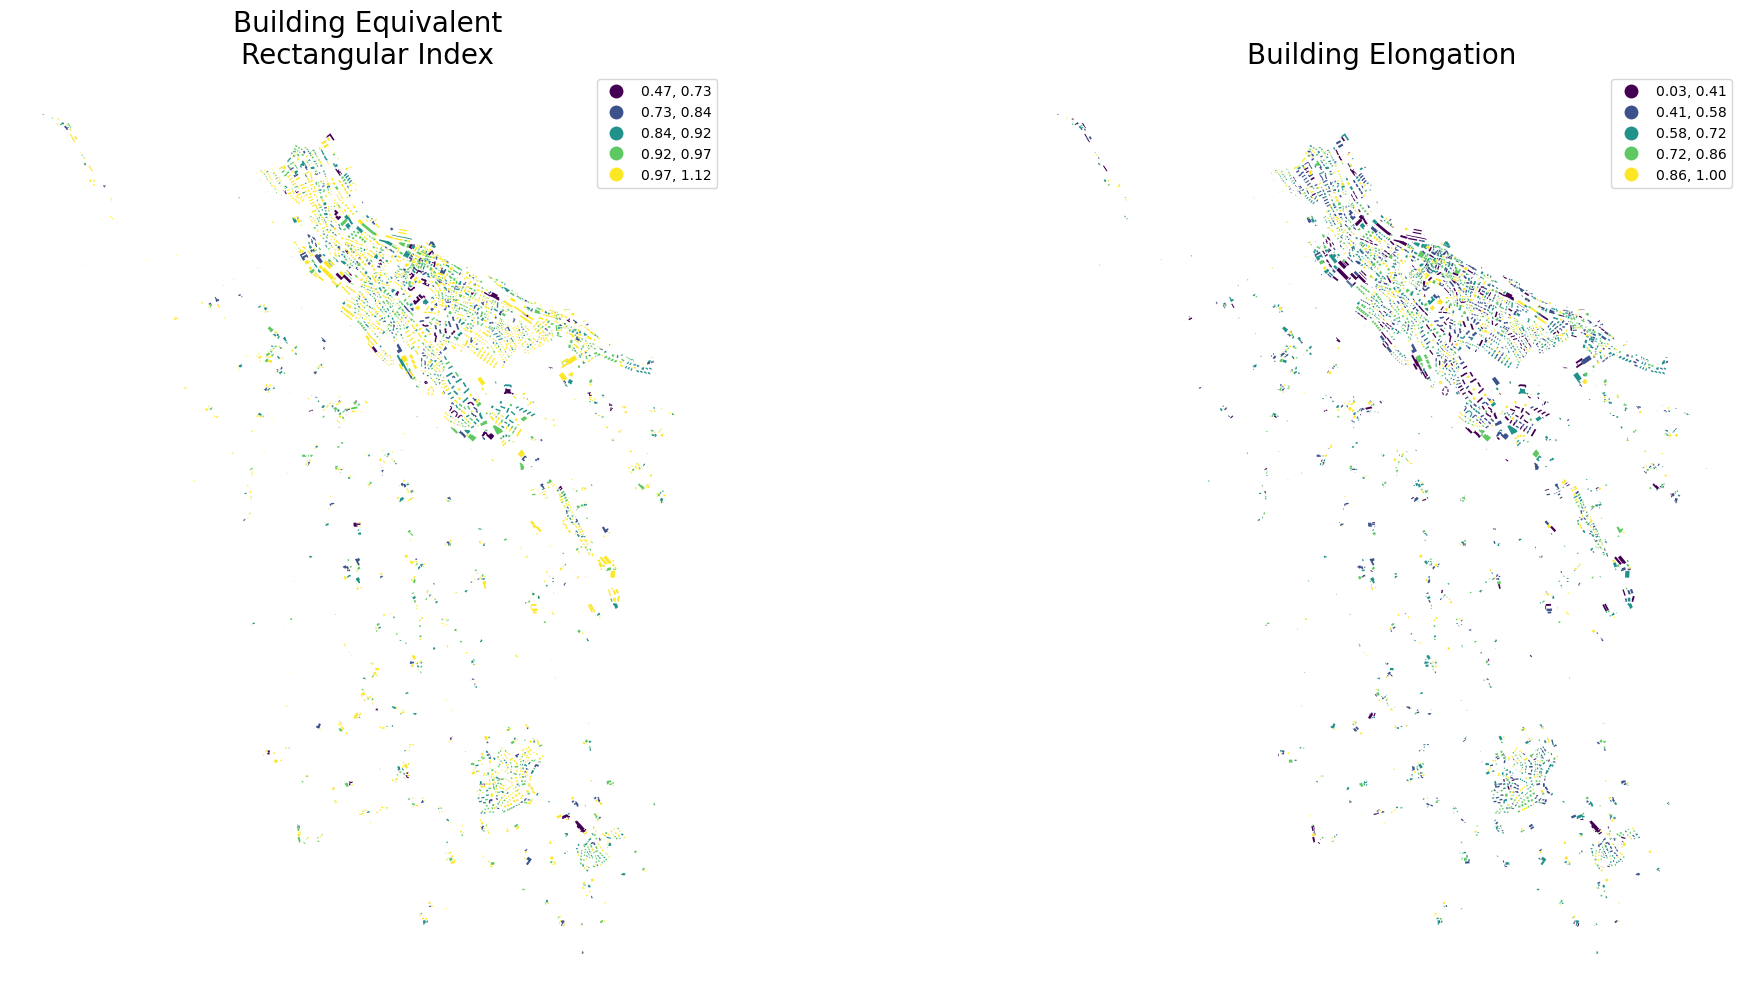

In [63]:
fig, ax = plt.subplots(1, 2, figsize=(24, 12))

buildings.plot("eri", ax=ax[0], scheme="natural_breaks", legend=True)
buildings.plot("elongation", ax=ax[1], scheme="natural_breaks", legend=True)

ax[0].set_title('Building Equivalent\nRectangular Index', fontsize=20)
ax[1].set_title('Building Elongation', fontsize=20)

ax[0].set_axis_off()
ax[1].set_axis_off()

plt.savefig('../results/Horgen/eri_and_elongation.svg')  

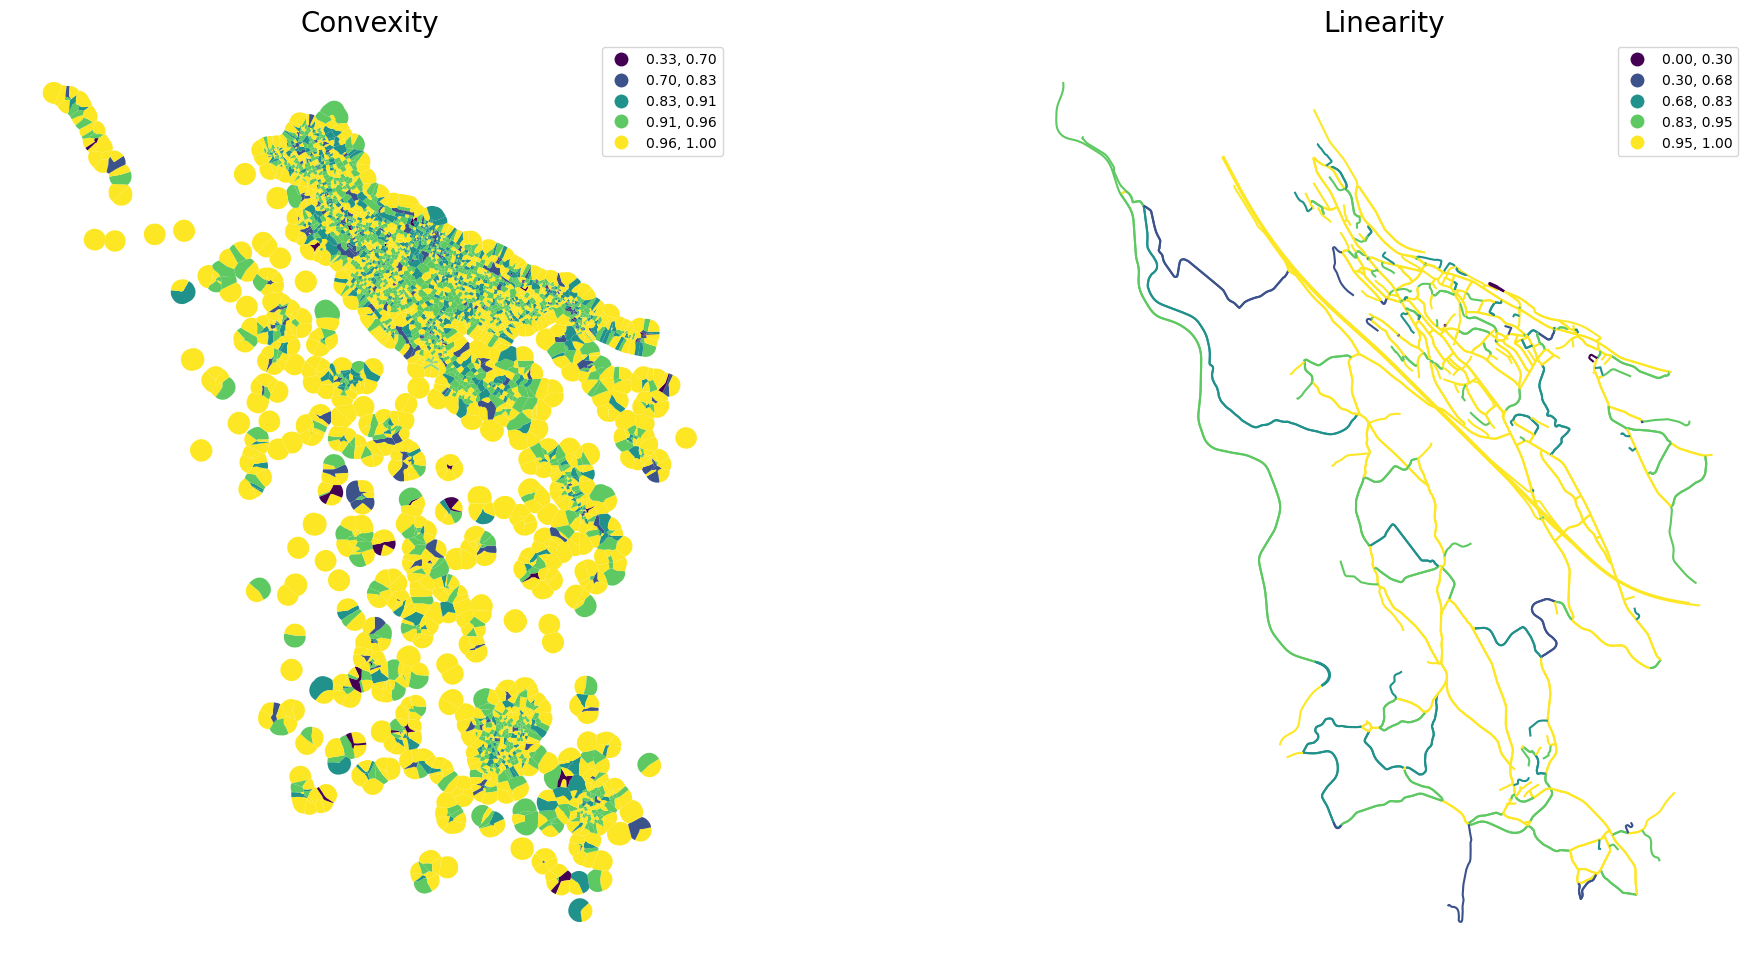

In [64]:
fig, ax = plt.subplots(1, 2, figsize=(24, 12))

tessellation.plot("convexity", ax=ax[0], scheme="natural_breaks", legend=True)
streets.plot("linearity", ax=ax[1], scheme="natural_breaks", legend=True)

ax[0].set_title('Convexity', fontsize=20)
ax[1].set_title('Linearity', fontsize=20)

ax[0].set_axis_off()
ax[1].set_axis_off()

plt.savefig('../results/Horgen/convexity_and_linearity.svg')  

### Spatial distribution

In [65]:
buildings["shared_walls"] = momepy.SharedWallsRatio(buildings).series

/Users/mtwente/anaconda3/envs/maxvogt/lib/python3.11/site-packages/momepy/distribution.py:214: FutureWarning: Class based API like `momepy.SharedWalls` or `momepy.SharedWallsRatio` is deprecated. Replace it with `momepy.shared_walls` or explicitly computing `momepy.shared_walls / gdf.length` respectively to use functional API instead or pin momepy version <1.0. Class-based API will be removed in 1.0. 
  super().__init__(gdf)
/Users/mtwente/anaconda3/envs/maxvogt/lib/python3.11/site-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)


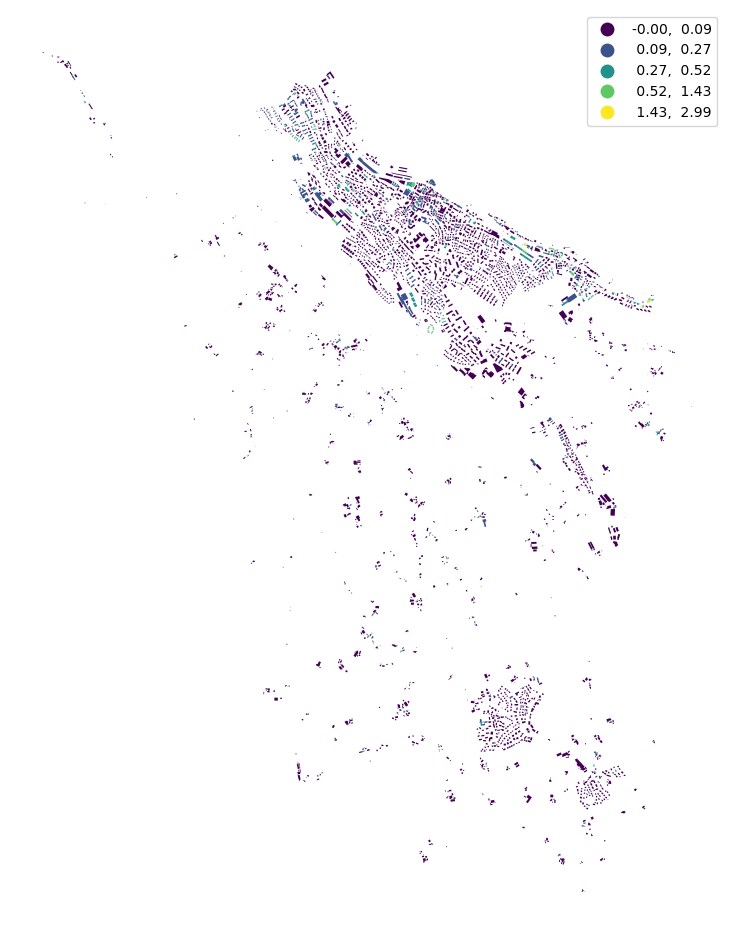

In [66]:
buildings.plot("shared_walls", figsize=(12, 12), scheme="natural_breaks", legend=True).set_axis_off()

plt.savefig('../results/Horgen/sharedwalls.svg')  

Generate spatial weights matrix using `libpysal`.

In [67]:
queen_1 = libpysal.weights.contiguity.Queen.from_dataframe(tessellation, ids="uID", silence_warnings=True)

In [68]:
tessellation["neighbors"] = momepy.Neighbors(tessellation, queen_1, "uID", weighted=True, verbose=False).series
tessellation["covered_area"] = momepy.CoveredArea(tessellation, queen_1, "uID", verbose=False).series

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    
    buildings["neighbor_distance"] = momepy.NeighborDistance(buildings, queen_1, "uID", verbose=False).series

/var/folders/vs/1r1r5k5x12v5dj0w9z79tj3c0000gn/T/ipykernel_17680/1669107924.py:1: FutureWarning: Class based API like `momepy.Neighbors` is deprecated. Replace it with `momepy.neighbors` to use functional API instead or pin momepy version <1.0. Class-based API will be removed in 1.0. 
  tessellation["neighbors"] = momepy.Neighbors(tessellation, queen_1, "uID", weighted=True, verbose=False).series
/var/folders/vs/1r1r5k5x12v5dj0w9z79tj3c0000gn/T/ipykernel_17680/1669107924.py:2: FutureWarning: `momepy.CoveredArea` is deprecated. Replace it with `.describe()` method of libpysal.graph.Graph or pin momepy version <1.0. This class will be removed in 1.0. 
  tessellation["covered_area"] = momepy.CoveredArea(tessellation, queen_1, "uID", verbose=False).series


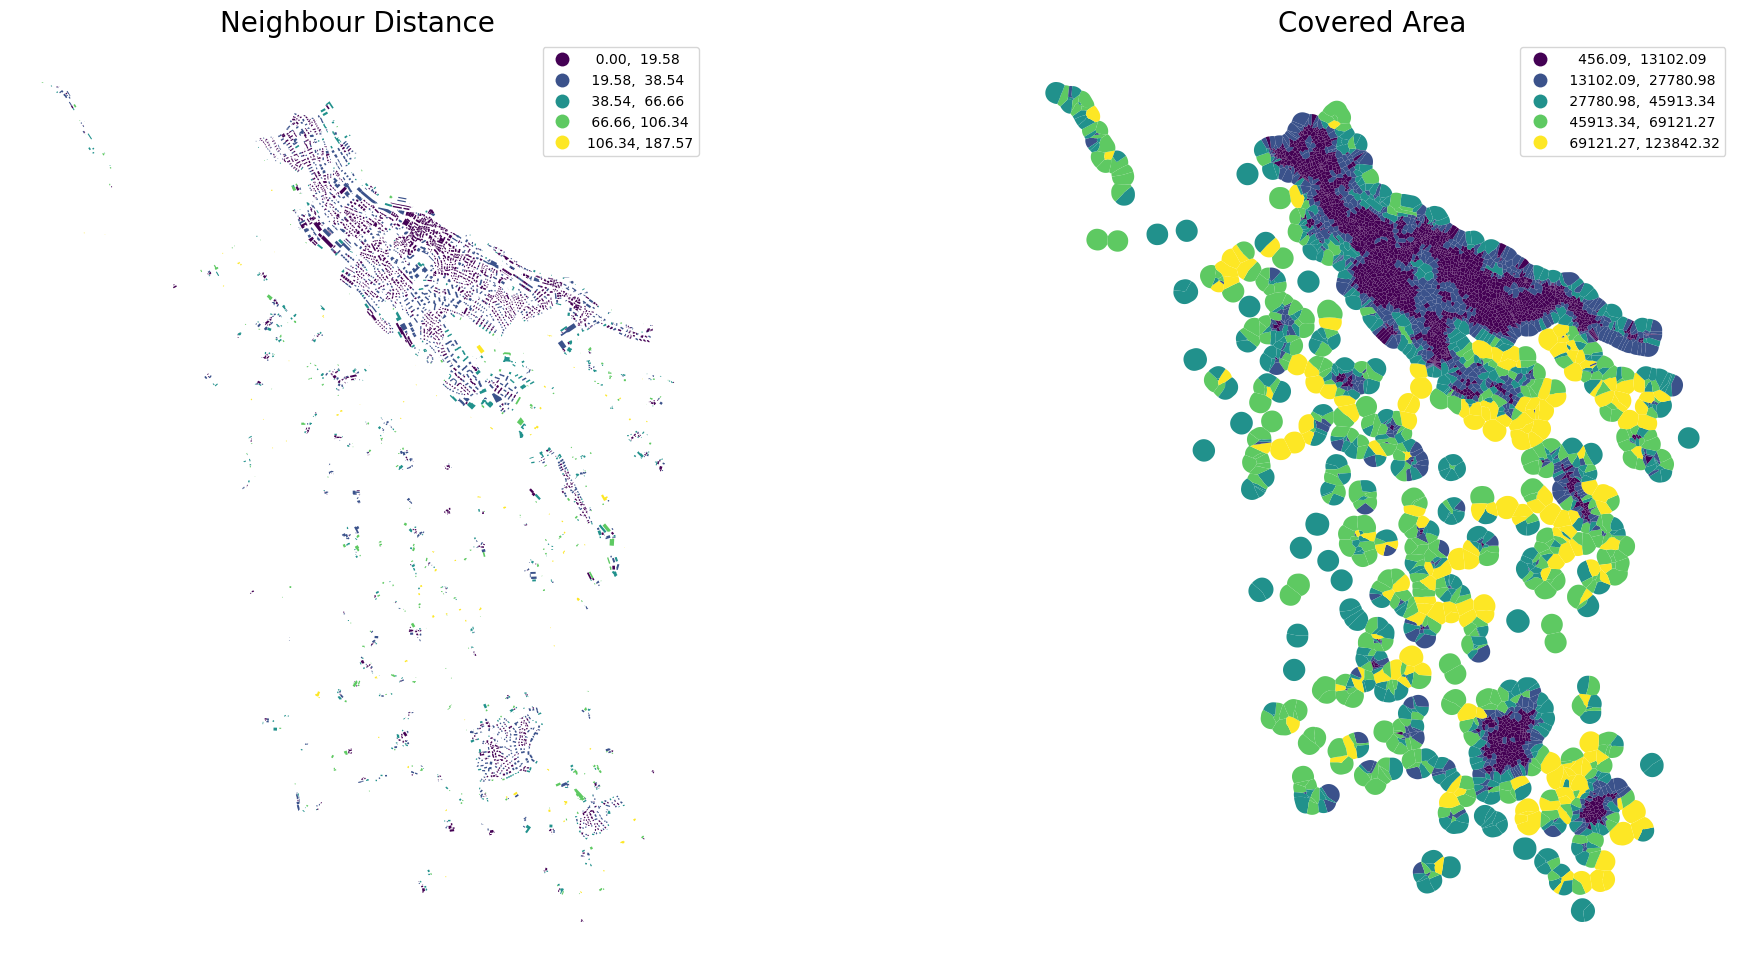

In [69]:
fig, ax = plt.subplots(1, 2, figsize=(24, 12))

buildings.plot("neighbor_distance", ax=ax[0], scheme="natural_breaks", legend=True)
tessellation.plot("covered_area", ax=ax[1], scheme="natural_breaks", legend=True)

ax[0].set_title('Neighbour Distance', fontsize=20)
ax[1].set_title('Covered Area', fontsize=20)


ax[0].set_axis_off()
ax[1].set_axis_off()

plt.savefig('../results/Horgen/neighbourdist_and_coveredarea.svg')  

In [70]:
queen_3 = momepy.sw_high(k=3, weights=queen_1)
buildings_q1 = libpysal.weights.contiguity.Queen.from_dataframe(buildings, silence_warnings=True)

buildings['interbuilding_distance'] = momepy.MeanInterbuildingDistance(buildings, queen_1, 'uID', queen_3, verbose=False).series
buildings['adjacency'] = momepy.BuildingAdjacency(buildings, queen_3, 'uID', buildings_q1, verbose=False).series

/var/folders/vs/1r1r5k5x12v5dj0w9z79tj3c0000gn/T/ipykernel_17680/3221532125.py:1: FutureWarning: `momepy.sw_high` is deprecated. Replace it with .higher_order() method of libpysal.graph.Graph or pin momepy version <1.0. This class will be removed in 1.0. 
  queen_3 = momepy.sw_high(k=3, weights=queen_1)
/var/folders/vs/1r1r5k5x12v5dj0w9z79tj3c0000gn/T/ipykernel_17680/3221532125.py:2: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  buildings_q1 = libpysal.weights.contiguity.Queen.from_dataframe(buildings, silence_warnings=True)
/var/folders/vs/1r1r5k5x12v5dj0w9z79tj3c0000gn/T/ipykernel_17680/3221532125.py:4: FutureWarning: Class based API like `momepy.MeanInterbuildingDistance` is deprecated. Replace it with `momepy.mean_interbuilding_distance` to use functional API instead or pin momepy version <1.0. Class-based API will be removed in 1.0. 
  buildings['interbuilding_distance'] 

In [71]:
#fig, ax = plt.subplots(1, 2, figsize=(24, 12))
#
#buildings.plot("interbuilding_distance", ax=ax[0], scheme="natural_breaks", legend=True)
#buildings.plot("adjacency", ax=ax[1], scheme="natural_breaks", legend=True)
#
#ax[0].set_axis_off()
#ax[1].set_axis_off()

In [72]:
profile = momepy.StreetProfile(streets, buildings)
streets["width"] = profile.w
streets["width_deviation"] = profile.wd
streets["openness"] = profile.o

/var/folders/vs/1r1r5k5x12v5dj0w9z79tj3c0000gn/T/ipykernel_17680/2648127835.py:1: FutureWarning: Class based API like `momepy.StreetProfile` is deprecated. Replace it with `momepy.street_profile` to use functional API instead or pin momepy version <1.0. Class-based API will be removed in 1.0. 
  profile = momepy.StreetProfile(streets, buildings)
/Users/mtwente/anaconda3/envs/maxvogt/lib/python3.11/site-packages/pandas/core/arraylike.py:492: RuntimeWarning: invalid value encountered in intersection
  return getattr(ufunc, method)(*new_inputs, **kwargs)


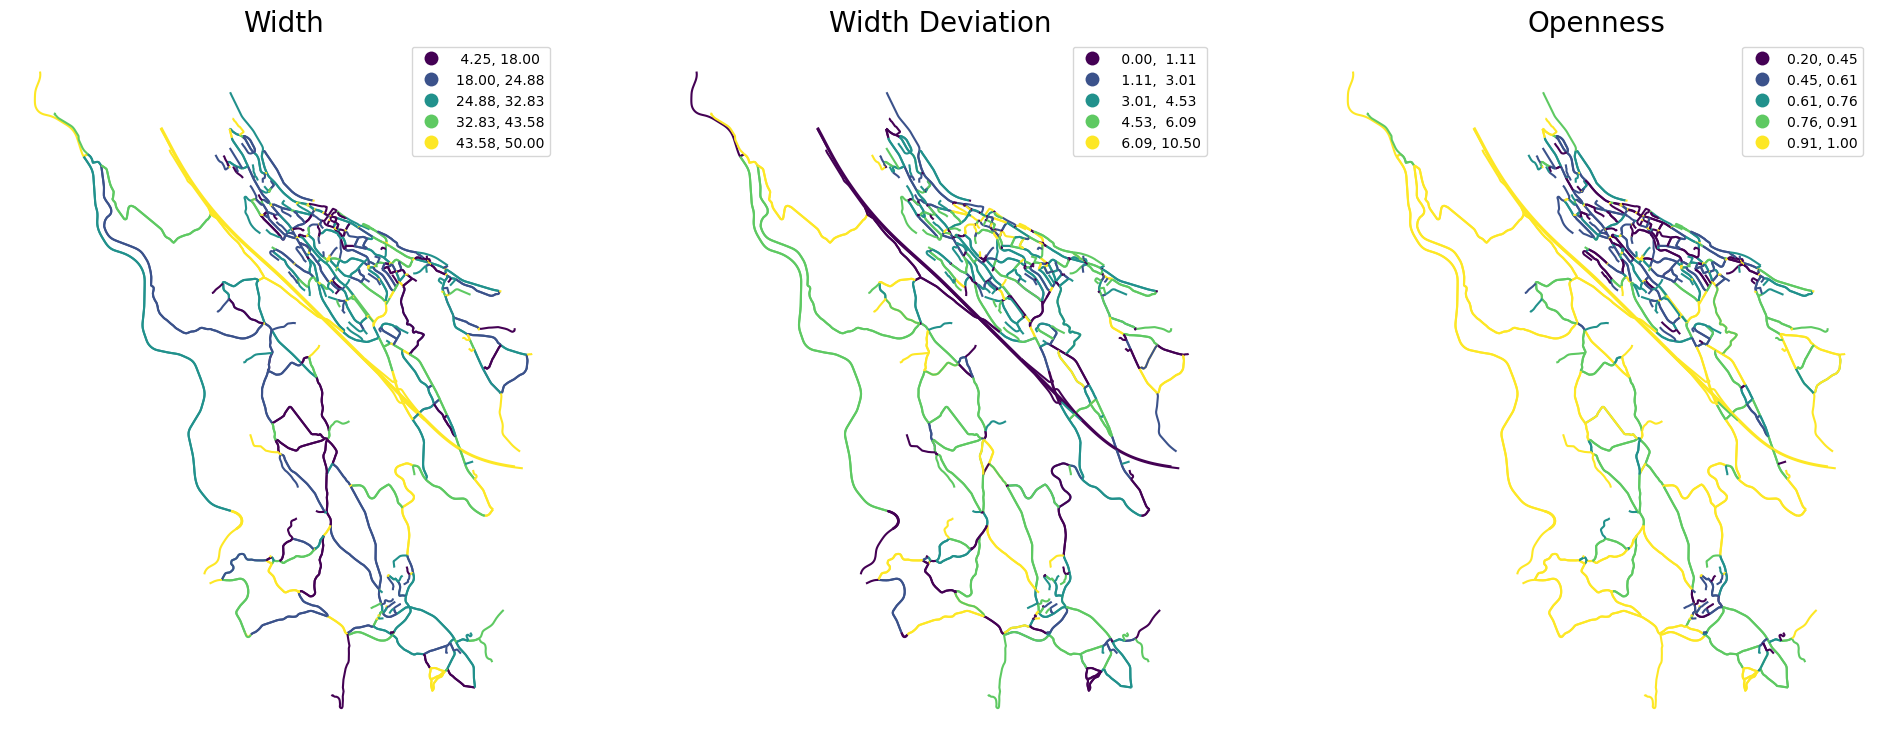

In [73]:
fig, ax = plt.subplots(1, 3, figsize=(24, 12))

streets.plot("width", ax=ax[0], scheme="natural_breaks", legend=True)
streets.plot("width_deviation", ax=ax[1], scheme="natural_breaks", legend=True)
streets.plot("openness", ax=ax[2], scheme="natural_breaks", legend=True)

ax[0].set_title('Width', fontsize=20)
ax[1].set_title('Width Deviation', fontsize=20)
ax[2].set_title('Openness', fontsize=20)

ax[0].set_axis_off()
ax[1].set_axis_off()
ax[2].set_axis_off()

plt.savefig('../results/Horgen/road_network.svg')  

### Intensity

In [74]:
tessellation['car'] = momepy.AreaRatio(tessellation, buildings, 'area', 'area', 'uID').series

/var/folders/vs/1r1r5k5x12v5dj0w9z79tj3c0000gn/T/ipykernel_17680/1819725789.py:1: FutureWarning: `momepy.AreaRatio` is deprecated. Replace it with a direct division of areas or momepy.describe_agg() or pin momepy version <1.0. This class will be removed in 1.0. 
  tessellation['car'] = momepy.AreaRatio(tessellation, buildings, 'area', 'area', 'uID').series


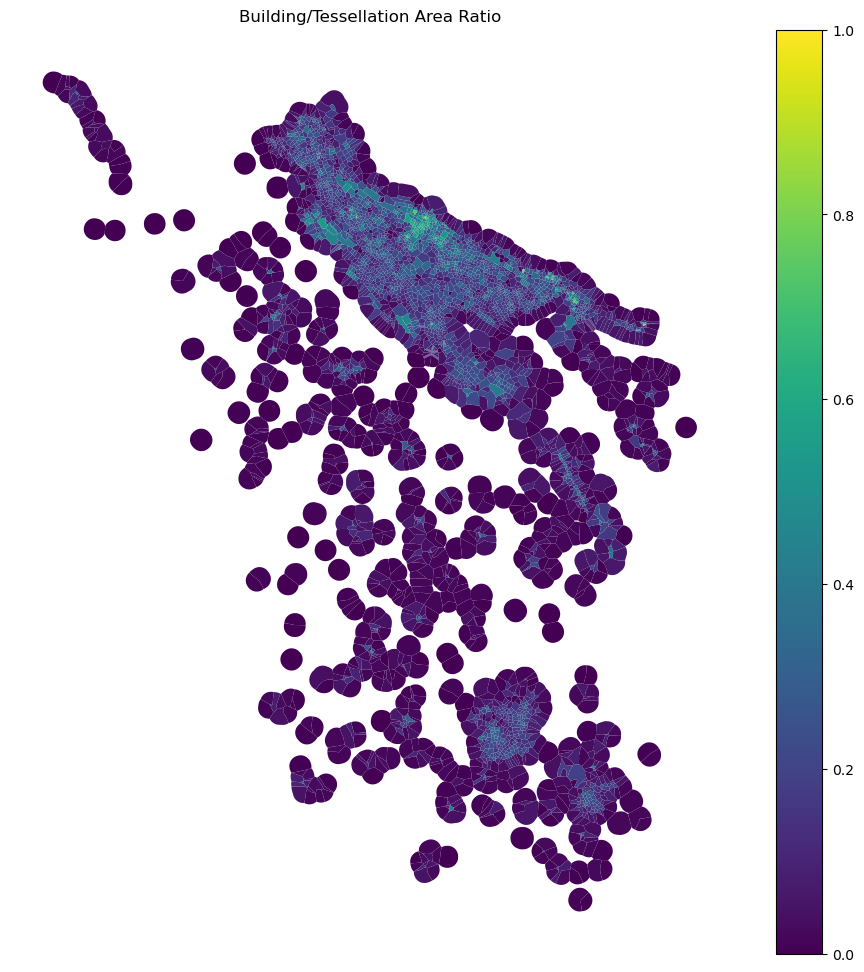

In [75]:
tessellation.plot("car", figsize=(12, 12), vmin=0, vmax=1, legend=True).set_axis_off()
plt.title("Building/Tessellation Area Ratio")

plt.savefig('../results/Buchs/tessellation_ratio.svg')  

### Connectivity

In [76]:
graph = momepy.gdf_to_nx(streets)

In [77]:
graph = momepy.node_degree(graph)
graph = momepy.closeness_centrality(graph, radius=400, distance="mm_len")
graph = momepy.meshedness(graph, radius=400, distance="mm_len")

  0%|          | 0/520 [00:00<?, ?it/s]

  0%|          | 0/520 [00:00<?, ?it/s]

In [78]:
nodes, streets = momepy.nx_to_gdf(graph)

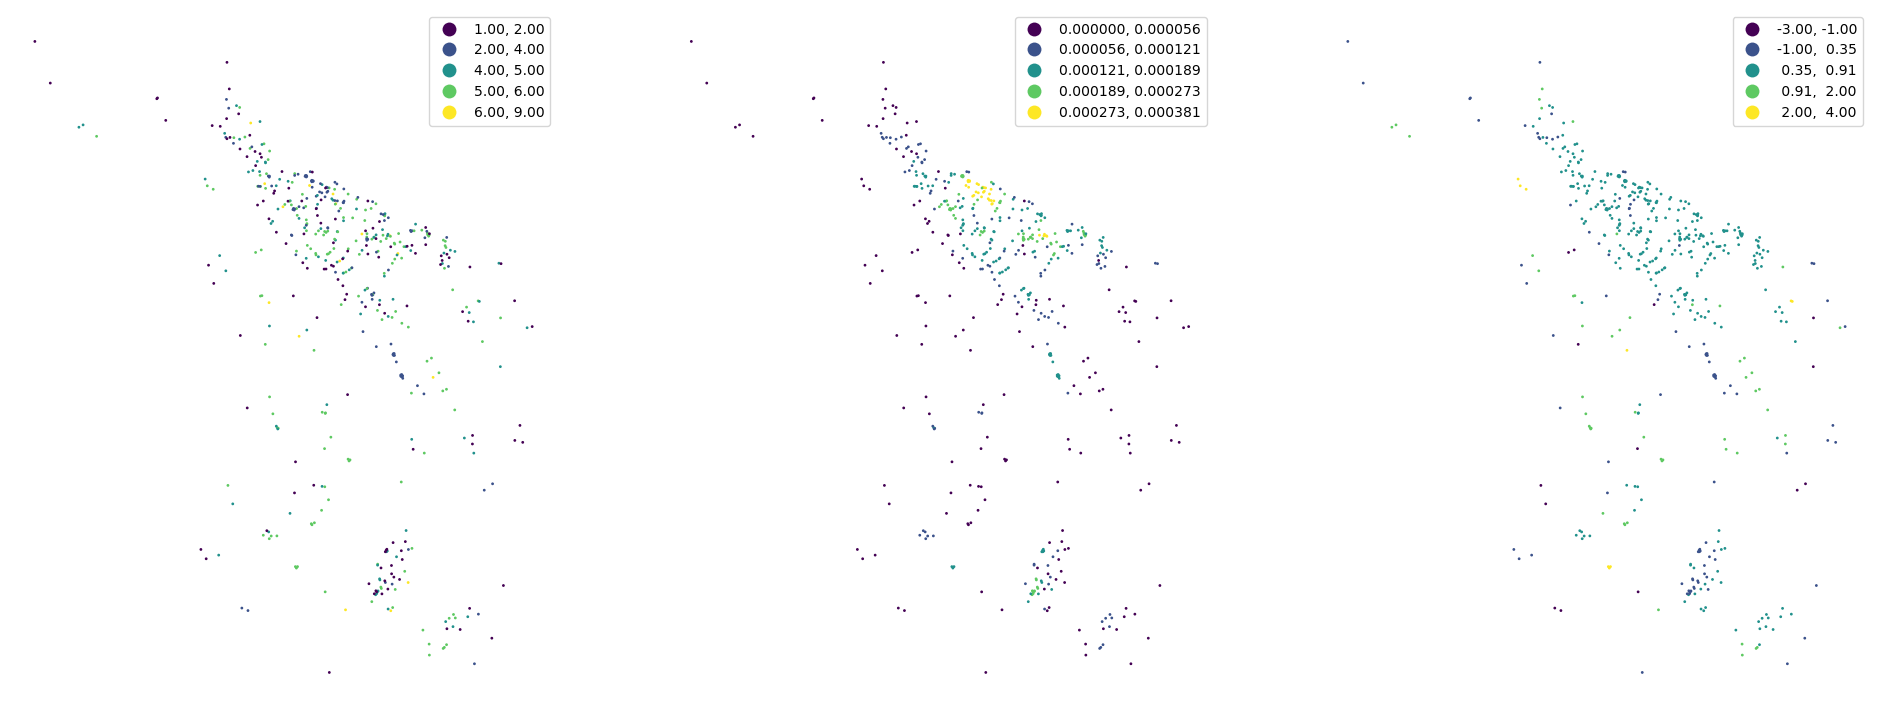

In [79]:
fig, ax = plt.subplots(1, 3, figsize=(24, 12))

nodes.plot("degree", ax=ax[0], scheme="natural_breaks", legend=True, markersize=1)
nodes.plot("closeness", ax=ax[1], scheme="natural_breaks", legend=True, markersize=1, legend_kwds={"fmt": "{:.6f}"})
nodes.plot("meshedness", ax=ax[2], scheme="natural_breaks", legend=True, markersize=1)

ax[0].set_axis_off()
ax[1].set_axis_off()
ax[2].set_axis_off()

plt.savefig('../results/Horgen/connectivity.svg')  

In [80]:
buildings["nodeID"] = momepy.get_node_id(buildings, nodes, streets, "nodeID", "nID")

/var/folders/vs/1r1r5k5x12v5dj0w9z79tj3c0000gn/T/ipykernel_17680/403706460.py:1: FutureWarning: Class based API like `momepy.get_node_id` is deprecated. Replace it with `momepy.get_nearest_node` to use functional API instead or pin momepy version <1.0. Class-based API will be removed in 1.0. 
  buildings["nodeID"] = momepy.get_node_id(buildings, nodes, streets, "nodeID", "nID")


  0%|          | 0/4405 [00:00<?, ?it/s]

Link all data together (to tessellation cells or buildings).

In [81]:
tessellation

uID                                           geometry   nID  \
0     3899  POLYGON ((2689319.058 1228502.785, 2689319.373...   909   
1     2519  POLYGON ((2689877.834 1229266.445, 2689878.299...  1067   
2     2550  POLYGON ((2689503.117 1228802.495, 2689502.828...   231   
3     2552  POLYGON ((2689455.083 1228900.881, 2689453.879...   231   
4     2553  POLYGON ((2689582.424 1229277.091, 2689583.224...   236   
...    ...                                                ...   ...   
4397  3567  POLYGON ((2684418.216 1236283.851, 2684417.790...   951   
4398  3168  POLYGON ((2684517.058 1236218.230, 2684516.937...   951   
4399  1077  POLYGON ((2686636.264 1236016.009, 2686635.376...   385   
4400  3058  POLYGON ((2684352.774 1236379.668, 2684340.129...   951   
4401  3059  POLYGON ((2684438.083 1236281.038, 2684437.746...   951   

              area  convexity  neighbors  covered_area       car  
0     13536.968857   0.999685   0.002196  40591.707399  0.001398  
1     14206.747812   0.971804   0.002107  38576.168129  0.008151  
2     17390.268825   0.995609   0.003911  69629.139769  0.007822  
3     28673.263230   0.997154   0.004734  83935.908790  0.004550  
4     40005.075688   0.998041   0.004150  80999.264679  0.016470  
...            ...        ...        ...           ...       ...  
4397   3517.037790   0.741056   0.009379  24418.652313  0.026464  
4398  16446.356915   0.984527   0.012133  53586.974197  0.028138  
4399  13928.036878   0.991460   0.008741  21846.889918  0.018775  
4400  26998.373794   0.997732   0.001617  38883.381637  0.003054  
4401   7648.509071   0.997930   0.011688  33532.051510  0.001875  

[4402 rows x 8 columns]

In [82]:
merged = tessellation.merge(buildings.drop(columns=['nID', 'geometry']), on='uID')
merged = merged.merge(streets.drop(columns='geometry'), on='nID', how='left')
merged = merged.merge(nodes.drop(columns='geometry'), on='nodeID', how='left')

In [83]:
merged.columns

Index(['uID', 'geometry', 'nID', 'area_x', 'convexity', 'neighbors',
       'covered_area', 'car', 'area_y', 'eri', 'elongation', 'shared_walls',
       'neighbor_distance', 'interbuilding_distance', 'adjacency', 'nodeID',
       'length', 'linearity', 'width', 'width_deviation', 'openness', 'mm_len',
       'node_start', 'node_end', 'x', 'y', 'degree', 'closeness',
       'meshedness'],
      dtype='object')

## Understanding the context

Measure first, second and third quartile of distribution of values within an area around each building.

In [84]:
percentiles = []
for column in merged.columns.drop(["uID", "nodeID", "nID", 'mm_len', 'node_start', 'node_end', "geometry"]):
    perc = momepy.Percentiles(merged, column, queen_3, "uID", verbose=False).frame
    perc.columns = [f"{column}_" + str(x) for x in perc.columns]
    percentiles.append(perc)

/var/folders/vs/1r1r5k5x12v5dj0w9z79tj3c0000gn/T/ipykernel_17680/962013058.py:3: FutureWarning: Class based API like `momepy.Percentiles` is deprecated. Replace it with `momepy.percentile` to use functional API instead or pin momepy version <1.0. Class-based API will be removed in 1.0. 
  perc = momepy.Percentiles(merged, column, queen_3, "uID", verbose=False).frame
/var/folders/vs/1r1r5k5x12v5dj0w9z79tj3c0000gn/T/ipykernel_17680/962013058.py:3: FutureWarning: Class based API like `momepy.Percentiles` is deprecated. Replace it with `momepy.percentile` to use functional API instead or pin momepy version <1.0. Class-based API will be removed in 1.0. 
  perc = momepy.Percentiles(merged, column, queen_3, "uID", verbose=False).frame
/var/folders/vs/1r1r5k5x12v5dj0w9z79tj3c0000gn/T/ipykernel_17680/962013058.py:3: FutureWarning: Class based API like `momepy.Percentiles` is deprecated. Replace it with `momepy.percentile` to use functional API instead or pin momepy version <1.0. Class-based API

In [85]:
percentiles_joined = pandas.concat(percentiles, axis=1)

In [86]:
percentiles_joined

area_x_25     area_x_50     area_x_75  convexity_25  convexity_50  \
0     20295.853700  20295.853700  20295.853700      0.926016      0.926016   
1      8312.384337  13893.159983  29750.383925      0.976395      0.988553   
2     12678.932766  14306.769020  21814.991149      0.913928      0.975653   
3      7971.941841  13119.079225  16687.462905      0.911438      0.976800   
4      1250.221776   2625.603244   8371.837168      0.943774      0.969071   
...            ...           ...           ...           ...           ...   
4397   3062.904136   7478.348459  13197.316837      0.918197      0.983055   
4398   3676.395892   6707.813043  11252.852991      0.943990      0.959093   
4399    462.725229   1392.490924   2392.734452      0.898778      0.955623   
4400   4034.543958   7478.348459  11200.428376      0.918197      0.964269   
4401   4552.050125   7648.509071  11704.140047      0.944098      0.982650   

      convexity_75  neighbors_25  neighbors_50  neighbors_75  covered_area_25  \
0         0.926016      0.001830      0.001830      0.001830     40591.707399   
1         0.994496      0.004256      0.005333      0.015039     62877.036349   
2         0.995598      0.004804      0.005887      0.009185     60535.816244   
3         0.994006      0.005394      0.009645      0.014407     41491.483420   
4         0.983559      0.015141      0.022922      0.033719     17771.773612   
...            ...           ...           ...           ...              ...   
4397      0.992881      0.009690      0.013852      0.016316     34580.621922   
4398      0.988009      0.009690      0.013428      0.016318     35423.593686   
4399      0.989855      0.016694      0.041426      0.068439      8624.710343   
4400      0.996001      0.008701      0.010844      0.016316     34580.621922   
4401      0.994270      0.008703      0.011688      0.015752     35629.192334   

      ...          y_75  degree_25  degree_50  degree_75  closeness_25  \
0     ...  1.229059e+06        6.0        6.0        6.0      0.000041   
1     ...  1.229563e+06        2.5        4.0        5.5      0.000005   
2     ...  1.229191e+06        4.0        6.0        6.0      0.000000   
3     ...  1.229191e+06        6.0        6.0        6.0      0.000041   
4     ...  1.229546e+06        1.0        5.0        5.5      0.000041   
...   ...           ...        ...        ...        ...           ...   
4397  ...  1.236327e+06        1.0        1.0        1.0      0.000000   
4398  ...  1.236327e+06        1.0        1.0        5.0      0.000000   
4399  ...  1.236018e+06        4.0        5.0        6.0      0.000025   
4400  ...  1.236327e+06        1.0        1.0        1.0      0.000000   
4401  ...  1.236327e+06        1.0        1.0        5.0      0.000000   

      closeness_50  closeness_75  meshedness_25  meshedness_50  meshedness_75  
0         0.000041      0.000041       1.285714       1.285714       1.285714  
1         0.000032      0.000063      -0.000000       0.400000       0.428571  
2         0.000041      0.000059       0.000000       0.909091       1.285714  
3         0.000059      0.000059       0.909091       0.909091       1.097403  
4         0.000051      0.000067       0.400000       0.555556       0.555556  
...            ...           ...            ...            ...            ...  
4397      0.000000      0.000000      -0.000000      -0.000000      -0.000000  
4398      0.000000      0.000024      -0.000000      -0.000000       2.000000  
4399      0.000042      0.000042       0.857143       0.857143       1.000000  
4400      0.000000      0.000000      -0.000000      -0.000000      -0.000000  
4401      0.000000      0.000024       0.000000       0.000000       2.000000  

[4402 rows x 66 columns]

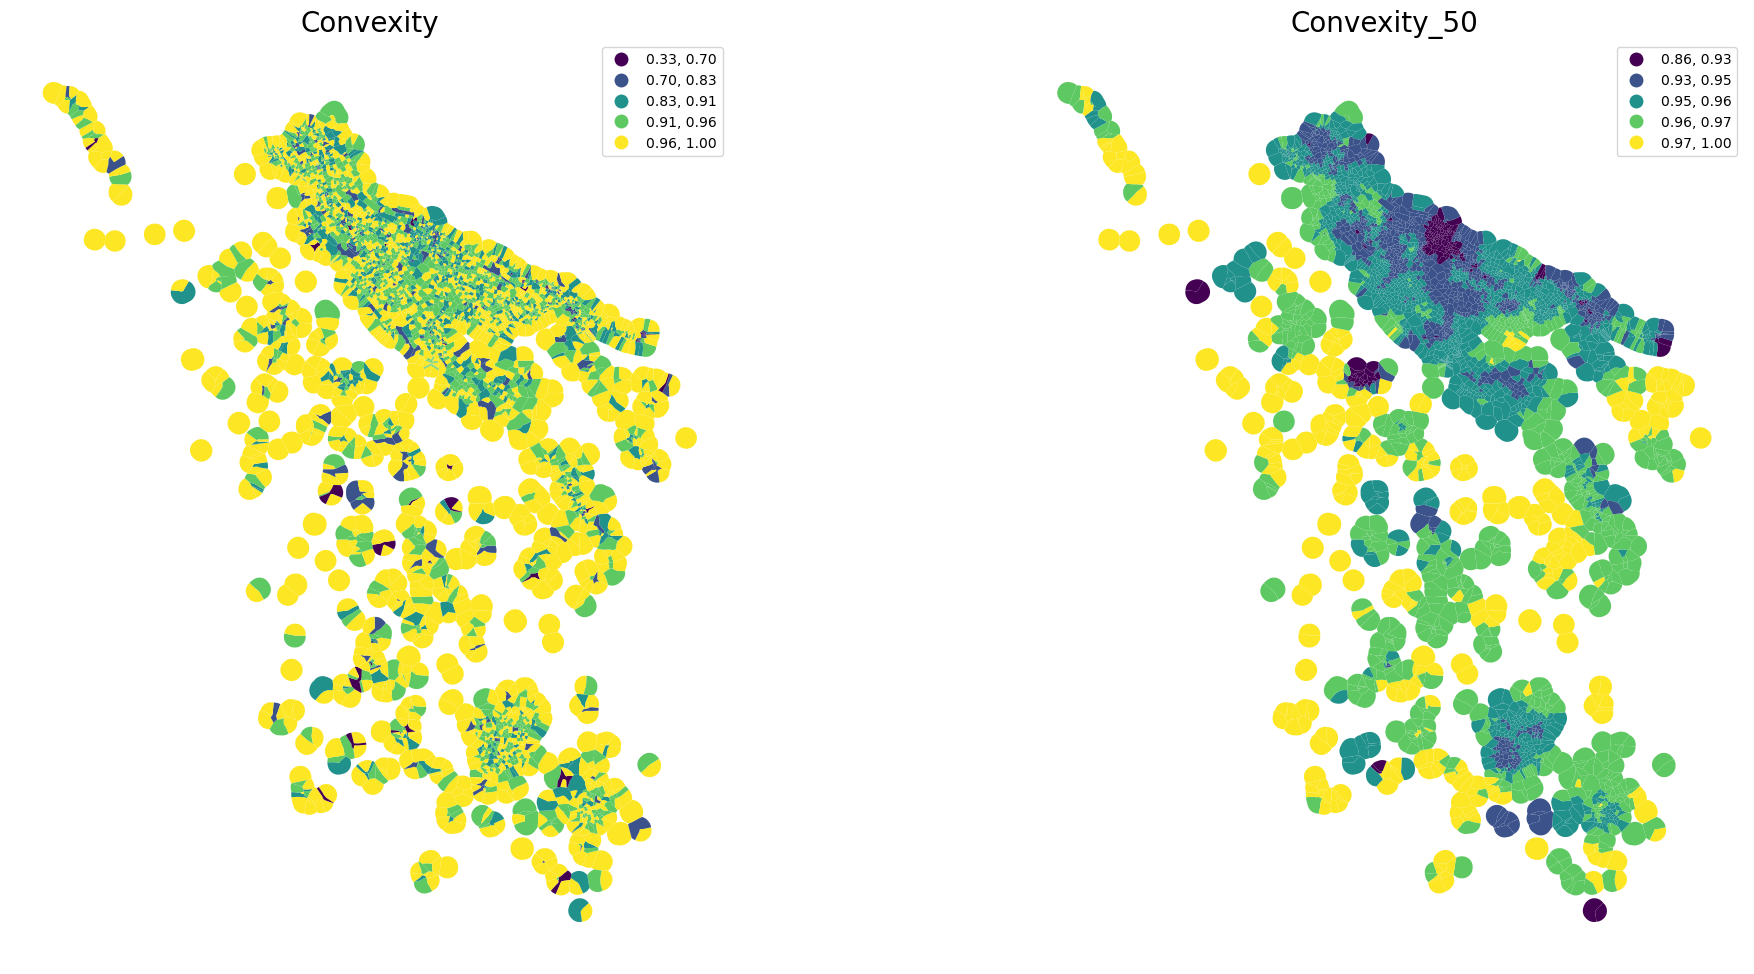

In [87]:
fig, ax = plt.subplots(1, 2, figsize=(24, 12))

tessellation.plot("convexity", ax=ax[0], scheme="natural_breaks", legend=True)
merged.plot(percentiles_joined['convexity_50'].values, ax=ax[1], scheme="natural_breaks", legend=True)

ax[0].set_title('Convexity', fontsize=20)
ax[1].set_title('Convexity_50', fontsize=20)

ax[0].set_axis_off()
ax[1].set_axis_off()

plt.savefig('../results/Horgen/convexity.svg')  

## Clustering

Standardize values before clustering.

In [53]:
standardized = (percentiles_joined - percentiles_joined.mean()) / percentiles_joined.std()

In [54]:
standardized

area_x_25  area_x_50  area_x_75  convexity_25  convexity_50  \
0      5.964129   4.489802   2.971976      0.147309     -2.050268   
1      2.145222   2.851285   4.769267      2.340401      2.256864   
2      3.536759   2.957132   3.260761     -0.378915      1.368420   
3      2.036729   2.653190   2.286026     -0.487309      1.447428   
4     -0.105357  -0.032202   0.705238      0.920354      0.915060   
...         ...        ...        ...           ...           ...   
4397   0.472311   1.209667   1.622555     -0.193087      1.878239   
4398   0.667819   1.012479   1.252915      0.929731      0.227862   
4399  -0.356317  -0.347769  -0.431380     -1.038443     -0.011123   
4400   0.781954   1.209667   1.242949     -0.193087      0.584331   
4401   0.946874   1.253213   1.338704      0.934465      1.850354   

      convexity_75  neighbors_25  neighbors_50  neighbors_75  covered_area_25  \
0        -4.838937     -1.944423     -2.249626     -2.466641         2.233410   
1         1.774134     -1.771262     -2.030680     -1.757687         4.043226   
2         1.880554     -1.732157     -1.996012     -2.071872         3.853093   
3         1.726819     -1.690036     -1.761195     -1.791604         2.306482   
4         0.718000     -0.994383     -0.931319     -0.755058         0.380178   
...            ...           ...           ...           ...              ...   
4397      1.618188     -1.383412     -1.498203     -1.689119         1.745243   
4398      1.147742     -1.383412     -1.524727     -1.689026         1.813702   
4399      1.326029     -0.883526      0.225139      1.108394        -0.362665   
4400      1.919509     -1.453998     -1.686205     -1.689119         1.745243   
4401      1.752384     -1.453835     -1.633493     -1.719419         1.830399   

      ...      y_75  degree_25  degree_50  degree_75  closeness_25  \
0     ... -2.444281   1.135398   0.703586   0.320717     -0.587106   
1     ... -2.174389  -0.712788  -0.739482  -0.167963     -1.131420   
2     ... -2.373496   0.079292   0.703586   0.320717     -1.207278   
3     ... -2.373496   1.135398   0.703586   0.320717     -0.587106   
4     ... -2.183213  -1.504867  -0.017948  -0.167963     -0.588328   
...   ...       ...        ...        ...        ...           ...   
4397  ...  1.449723  -1.504867  -2.904084  -4.566089     -1.207278   
4398  ...  1.449723  -1.504867  -2.904084  -0.656644     -1.207278   
4399  ...  1.283781   0.079292  -0.017948   0.320717     -0.835819   
4400  ...  1.449723  -1.504867  -2.904084  -4.566089     -1.207278   
4401  ...  1.449723  -1.504867  -2.904084  -0.656644     -1.207278   

      closeness_50  closeness_75  meshedness_25  meshedness_50  meshedness_75  
0        -0.818632     -0.994063       1.155988       0.943902       0.739740  
1        -0.945250     -0.744876      -0.688147      -0.300631      -0.403002  
2        -0.818632     -0.791357      -0.688147       0.414701       0.739740  
3        -0.594654     -0.791357       0.615787       0.414701       0.488683  
4        -0.697673     -0.698258      -0.114416      -0.082057      -0.233707  
...            ...           ...            ...            ...            ...  
4397     -1.355241     -1.479710      -0.688147      -0.862679      -0.974373  
4398     -1.355241     -1.196904      -0.688147      -0.862679       1.692024  
4399     -0.810453     -0.986661       0.541276       0.341708       0.358826  
4400     -1.355241     -1.479710      -0.688147      -0.862679      -0.974373  
4401     -1.355241     -1.196904      -0.688147      -0.862679       1.692024  

[4402 rows x 66 columns]

### How many clusters?

In [55]:
cgram = Clustergram(range(1, 12), n_init=10, random_state=0)
cgram.fit(standardized.fillna(0))

K=1 skipped. Mean computed from data directly.
K=2 fitted in 0.039 seconds.
K=3 fitted in 0.048 seconds.
K=4 fitted in 0.064 seconds.
K=5 fitted in 0.069 seconds.
K=6 fitted in 0.127 seconds.
K=7 fitted in 0.077 seconds.
K=8 fitted in 0.074 seconds.
K=9 fitted in 0.089 seconds.
K=10 fitted in 0.085 seconds.
K=11 fitted in 0.101 seconds.


Clustergram(k_range=range(1, 12), backend='sklearn', method='kmeans', kwargs={'n_init': 10, 'random_state': 0})

In [56]:
show(cgram.bokeh())

In [57]:
cgram.labels.head()

1   2   3   4   5   6   7   8   9   10  11
0   0   0   1   3   3   3   0   5   0   5   7
1   0   0   1   3   2   4   0   5   0   5   7
2   0   0   1   3   2   4   0   5   0   5   7
3   0   0   1   3   2   4   2   2   4   2   2
4   0   0   1   0   4   1   4   6   5   1   3

In [58]:
merged["cluster"] = cgram.labels[8].values

In [59]:
urban_types = buildings[["geometry", "uID"]].merge(merged[["uID", "cluster"]], on="uID")

In [60]:
urban_types.explore("cluster", categorical=True, prefer_canvas=True, tiles="CartoDB Positron", tooltip=False)

## Export

Save cluster output geodata to geojson file:

In [61]:
urban_types.to_file('../data/raw/Horgen.geojson', driver='GeoJSON')

## Utilities

Once you run the cell below, it hides all cells below the currently active one (aka presentation mode).

In [ ]:
%%html
<style>
.jp-Cell.jp-mod-selected ~ .jp-Cell {
    display: none;
}
</style>

Run this cell to turn the presentation mode off.

In [ ]:
%%html
<style>
.jp-Cell.jp-mod-selected ~ .jp-Cell {
    display: block;
}
</style>